# EJERCICIO MÓDULO 3:

Uso de Pandas y Seaborn + algún gráfico de Plotly.

Dataset: diamonds.

IMPORTANTE: cargar el dataset desde CSV desde la carpeta Data porque tendrá nulos introducidos manualmente.

* PARTE 1: 25 % carga y limpieza
    * Carga con Pandas: pd.read_csv

    * Limpieza de valores error: 
        * hay columnas que tienen un valor '?', por tanto se deben reemplazar por un valor nan.

    * Cambio de tipo de dato: .astype() a numéricos y textos, por ejemplo a categorical y carat a float32 o float16

    * Limpieza de nulos (limpiar valores NaN):
        * Nulos en columnas continuas: mediana, media
        * Nulos en columnas categóricas: moda, un valor fijo

    * Encoding: texto a numérico
        * Uso de la función get_dummies() para encoding one_hot
        * Uso de map para encoding ordinal para la columna cut como una nueva columna cut_int: 1, 2, 3, 4

* PARTE 2: 25 % transformaciones:
    * Crear una columna price_iva a partir de la columna price que muestre el precio + IVA (21%). 
        * Ejemplo df['price'] * 1.21 

    * Crear una columna price_discount usando apply a partir de la columna price(con lambda o def):
        * price < 1000 and cut == 'Ideal' entonces 10 % descuento
        * 1000 <= price <= 5000 and cut == 'Premium' entonces 15 % descuento
        * si no entra en las condiciones sin descuento, devolver el precio original

    * Crear una nueva columna volumen combinando: x * y * z

    * Ordenar por dos columnas con sort_values():
        * tipo de corte (cut) y precio (price)

    * Agrupaciones con groupby y visualizarla
        * Agrupar por las 3 que hay de tipo categórico calculando la media, max, min por ejemplo de alguna de las numéricas: price, carat, depth

* PARTE 3: 20 % distribuciones: 

* Outliers: Visualización Q1 y Q3 y calcular límites tukey y filtrar. Sobre la columna precio.

* asimetría, curtosis y transformar datos con logaritmo o raíz cuadrada, aplicar sobre precio, visualizar el histograma y/o boxplot por tipo de corte. Opcional ajustar la escala.

* Discretizar la columna precio por barato, medio, caro usando la función pd.cut


* PARTE 4: 30 % visualizaciones:

* Seaborn EDAS:
    * univariantes:
        * histogramas y curvas de densidad
        * boxplot
        * countplot
    * bivariantes y multivariantes
        * scatterplot con hue, con size, con style
        * Calcular correlación con Pandas y mostrarla con seaborn
        * Hacer la correlación en un gráfico de barras para la columna 'price'
        * Crear una pivot table usando como index y columns algunas variables categóricas y como values usar el price y visualizarla con heatmap de seaborn
    * Combinarlas con:
        * hue, style, size, row, col usando un relplot
        * filtro


# EJERCICIO MÓDULO 3:

Uso de Pandas y Seaborn + algún gráfico de Plotly.

Dataset: diamonds.

IMPORTANTE: cargar el dataset desde CSV desde la carpeta Data porque tendrá nulos introducidos manualmente.

## PARTE 1: 
25 % carga y limpieza


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# todos los necesarios para el ejercicio mientras usemos np y sns
import matplotlib.pyplot as plt
from scipy import stats
import pickle as pkl

### 1.1. Carga con Pandas: pd.read_csv


In [2]:
df = pd.read_csv('../Data/diamonds.csv')

In [3]:
print("Primeras 10 filas del dataset:")
df.head(10)

Primeras 10 filas del dataset:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4,4.05,2.39


In [4]:
print("Información inicial del dataset:")
df.info()

Información inicial del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53937 non-null  object 
 2   color    53938 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53938 non-null  float64
 6   price    53938 non-null  object 
 7   x        53938 non-null  object 
 8   y        53939 non-null  float64
 9   z        53939 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


In [5]:
df.describe()

,carat,depth,table,y,z
count,53939.000000,53940.000000,53938.000000,53939.000000,53939.000000
mean,0.797946,61.749405,57.457145,5.734479,3.538722
std,0.474013,1.432621,2.234521,1.142092,0.705700
min,0.200000,43.000000,43.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,4.040000
max,5.010000,79.000000,95.000000,58.900000,31.800000


In [6]:
df.shape # 53940 filas y 10 columnas


(53940, 10)

In [7]:
df.keys() # obtenemos los nombres de las columnas

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [8]:
df.empty # nos dice si el dataframe está vacío

False

In [9]:
df.query # nos permite hacer consultas al dataframe

<bound method DataFrame.query of        carat        cut color clarity  depth  table price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0   326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0   326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0   327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0   334   4.2  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0   335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...   ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0  2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0  2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0  2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0  2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0  2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [10]:
df.values # nos devuelve los valores del dataframe en forma de array de filas

array([[0.23, 'Ideal', 'E', ..., '3.95', 3.98, 2.43],
       [0.21, 'Premium', 'E', ..., '3.89', 3.84, 2.31],
       [0.23, 'Good', 'E', ..., '4.05', 4.07, 2.31],
       ...,
       [0.7, 'Very Good', 'D', ..., '5.66', 5.68, 3.56],
       [0.86, 'Premium', 'H', ..., '6.15', 6.12, 3.74],
       [0.75, 'Ideal', 'D', ..., '5.83', 5.87, 3.64]],
      shape=(53940, 10), dtype=object)

### 1.2. Limpieza de valores error: 


Para trabajar más correctamente con un dataframe, es necesario limpia los datos, es decir, eliminar los valores nulos, duplicados y valores atípicos. Para ello, se pueden utilizar los siguientes métodos:

In [11]:
# Comprobar si hay valores nulos en cada columna (sean '?', 'nan, o no)
print("Número de valores nulos por columna:") 
print(df.isnull().sum()) 

Número de valores nulos por columna:
carat      1
cut        3
color      2
clarity    2
depth      0
table      2
price      2
x          2
y          1
z          1
dtype: int64


#### 1.2.1. sabemos que hay columnas que tienen un valor '?', por tanto se deben reemplazar por un valor nan.


In [12]:
# Verificar si hay valores exactamente iguales a '?'
print((df == '?').any().any())


True


In [13]:
# Buscar las filas donde hay valores '?'
rows_with_question_mark = df.isin(['?']).any(axis=1) # Devuelve una Serie con True en las filas que contienen '?'

# Mostrar las filas que contienen '?'
rows_with_question_mark_df = df[rows_with_question_mark] # Filtrar las filas que contienen '?'
print("Filas con valores '?':")
print(rows_with_question_mark_df) # imprime las filas que contienen '?'

Filas con valores '?':
       carat    cut color clarity  depth  table price     x     y     z
49222   0.56  Ideal     ?    VVS2   61.6   56.0  2081     ?  5.29  3.27
49227   0.50      ?     E    VVS2   61.7   61.0  2083  5.09  5.12  3.15
49229   0.70   Good     H     VS2   63.8   60.0     ?  5.59  5.51  3.54


In [14]:
# Buscar las filas donde hay valores texto
def busca_filas_con_texto(df, texto):
    # Identificar las filas que contienen el texto
    rows_with_texto_mark = df.isin([texto]).any(axis=1) # Devuelve una Serie con True en las filas que contienen 'texto'
    rows_with_texto_mark_df = df[rows_with_texto_mark] # Filtrar las filas que contienen 'texto'
    # Obtener los índices de las filas
    indices = rows_with_texto_mark_df.index.tolist()
    
    return rows_with_texto_mark_df, indices

texto = '?' # texto a buscar
filas_con_texto, indices = busca_filas_con_texto(df, texto)

busca_filas_con_texto(df, texto)
print(f"Filas con valores {texto}: ")
print(filas_con_texto) # imprime las filas que contienen 'texto'
print('------------------------------------')
print(f"Índices de las filas con valores '{texto}':")
print(indices)

Filas con valores ?: 
       carat    cut color clarity  depth  table price     x     y     z
49222   0.56  Ideal     ?    VVS2   61.6   56.0  2081     ?  5.29  3.27
49227   0.50      ?     E    VVS2   61.7   61.0  2083  5.09  5.12  3.15
49229   0.70   Good     H     VS2   63.8   60.0     ?  5.59  5.51  3.54
------------------------------------
Índices de las filas con valores '?':
[49222, 49227, 49229]


In [15]:
# Reemplazar valores '?' por NaN
df = df.replace('?', np.nan) 


In [16]:
# Comprobar si hay valores nulos en cada columna
print("Número de valores nulos por columna:")
print(df.isnull().sum()) # Devuelve el número de valores nulos por columna

Número de valores nulos por columna:
carat      1
cut        4
color      3
clarity    2
depth      0
table      2
price      3
x          3
y          1
z          1
dtype: int64


Hemos comprobado que aparecen 3 valores nulos en las columnas donde antes había interrogación

In [17]:
# Verificar si hay valores exactamente iguales a '?'
print((df == '?').any().any()) # Devuelve True si hay algún valor igual a '?'


False


con esto ya hemos quitado los interrogantes y los hemos sustituido por nan

### 1.3. Cambio de tipo de dato: .astype() a numéricos y textos, por ejemplo a categorical y carat a float32 o float16


In [18]:
df.info() # información del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53936 non-null  object 
 2   color    53937 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53938 non-null  float64
 6   price    53937 non-null  object 
 7   x        53937 non-null  object 
 8   y        53939 non-null  float64
 9   z        53939 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


In [19]:
# Cambiar el tipo de las columnas object (que no sean el precio) a categorical
df["cut"] = df["cut"].astype("category")
df["color"] = df["color"].astype("category")
df["clarity"] = df["clarity"].astype("category")

# Cambiar a float64 para poder usarlo para calcular el volumen
df["x"] = df["x"].astype("float64") 


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53939 non-null  float64 
 1   cut      53936 non-null  category
 2   color    53937 non-null  category
 3   clarity  53938 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53938 non-null  float64 
 6   price    53937 non-null  object  
 7   x        53937 non-null  float64 
 8   y        53939 non-null  float64 
 9   z        53939 non-null  float64 
dtypes: category(3), float64(6), object(1)
memory usage: 3.0+ MB


ya está cambiado el tipo de la columna cut

##### 1.3.1. cambio de tipo de dato de carat , a float16

In [20]:
df["carat"] = df["carat"].astype("float16") # Cambiar a float16 para reducir el uso de memoria
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53939 non-null  float16 
 1   cut      53936 non-null  category
 2   color    53937 non-null  category
 3   clarity  53938 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53938 non-null  float64 
 6   price    53937 non-null  object  
 7   x        53937 non-null  float64 
 8   y        53939 non-null  float64 
 9   z        53939 non-null  float64 
dtypes: category(3), float16(1), float64(5), object(1)
memory usage: 2.7+ MB


Ya hemos pasado el tipo de la columna carat de float64 a float 16 para ahorrar memoria

### 1.4. Limpieza de nulos (limpiar valores NaN):


In [21]:
# df['cut'].fillna(df['cut'].mode()[0], inplace=True)

In [22]:
# Comprobar si hay valores nulos en cada columna
print("Número de valores nulos por columna:")
print(df.isnull().sum()) # Devuelve el número de valores nulos por columna

Número de valores nulos por columna:
carat      1
cut        4
color      3
clarity    2
depth      0
table      2
price      3
x          3
y          1
z          1
dtype: int64


Vemos que hay nulos en casi todas las columnas, salvo en depth

In [23]:
# la columna price viene como object, hay que pasarla a número antes de quitar los nulos, porque si no tendríamos que poner la moda
df["price"] = pd.to_numeric(df["price"], errors="coerce")
# Cambiar a int32 para poder hacer gráficas
df["price"] = df["price"].astype("float32") 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53939 non-null  float16 
 1   cut      53936 non-null  category
 2   color    53937 non-null  category
 3   clarity  53938 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53938 non-null  float64 
 6   price    53937 non-null  float32 
 7   x        53937 non-null  float64 
 8   y        53939 non-null  float64 
 9   z        53939 non-null  float64 
dtypes: category(3), float16(1), float32(1), float64(5)
memory usage: 2.5 MB


In [24]:
'''def quita_nan(df):
    for i in df.keys():
        print(i)
        df[i].fillna(df[i].mode()[0], inplace=True)'''
        
        

'def quita_nan(df):\n    for i in df.keys():\n        print(i)\n        df[i].fillna(df[i].mode()[0], inplace=True)'

In [25]:
'''def quita_nan(df): # Función para reemplazar los NaN por la moda de cada columna
    # Iterar sobre las columnas del DataFrame
    for i in df.keys(): # Iterar sobre las columnas del dataframe
        # Calcular la asimetría (skewness) de la columna
        skewness = stats.skew(df[i].dropna()) # Calcular la asimetría de la columna sin NaN
        print(f'Asimetría de: {i} : {skewness}') # Imprimir la asimetría de la columna i

        # Reemplazar NaN según la asimetría
        if skewness > 1: # Si la asimetría es mayor a 1, reemplazar NaN por la mediana
            df[i].fillna(df[i].median(), inplace=True) # Reemplazar NaN por la mediana
            print(f"Rellenando nulos en {i} con la mediana {df[i].median()}") 

        else: # Si la asimetría es menor o igual a 1, reemplazar NaN por la media
            df[i].fillna(df[i].mean(), inplace=True) # Reemplazar NaN por la media
            print(f"Rellenando nulos en {i} con la media {df[i].mean()}") '''


'def quita_nan(df): # Función para reemplazar los NaN por la moda de cada columna\n    # Iterar sobre las columnas del DataFrame\n    for i in df.keys(): # Iterar sobre las columnas del dataframe\n        # Calcular la asimetría (skewness) de la columna\n        skewness = stats.skew(df[i].dropna()) # Calcular la asimetría de la columna sin NaN\n        print(f\'Asimetría de: {i} : {skewness}\') # Imprimir la asimetría de la columna i\n\n        # Reemplazar NaN según la asimetría\n        if skewness > 1: # Si la asimetría es mayor a 1, reemplazar NaN por la mediana\n            df[i].fillna(df[i].median(), inplace=True) # Reemplazar NaN por la mediana\n            print(f"Rellenando nulos en {i} con la mediana {df[i].median()}") \n\n        else: # Si la asimetría es menor o igual a 1, reemplazar NaN por la media\n            df[i].fillna(df[i].mean(), inplace=True) # Reemplazar NaN por la media\n            print(f"Rellenando nulos en {i} con la media {df[i].mean()}") '

In [26]:
def quita_nan(df):
    columnas_no_procesadas = []  # Lista Para registrar columnas que no se pudieron procesar
    print('------------------------------------')
    # Iterar sobre las columnas del DataFrame
    for i in df.columns:        
        print('\n************************************')
        print(f"Procesando columna: {i}")
        print('1....................................')
        # Validar si la columna contiene al menos un valor no nulo
        if df[i].dropna().empty:
            print(f"La columna {i} está completamente vacía. No se puede calcular la asimetría.")
            print('2....................................')
            columnas_no_procesadas.append((i, "Columna completamente vacía"))

        # Si la columna es numérica
        if df[i].dtype in [np.float64, np.float32, np.float16, np.int64, np.int32, np.int16]:
            # Validar si la columna contiene al menos un valor no nulo
 
            print(f"La columna {i} es numérica")

            # Calcular la asimetría (skewness) de la columna sin NaN
            skewness = stats.skew(df[i].dropna())
            print(f"Asimetría de {i}: {skewness}")
            print('4....................................')

            # Reemplazar NaN según la asimetría
            try:
                if skewness > 1:
                    mediana = df[i].median()
                    df[i].fillna(mediana, inplace=True)
                    print(f"Rellenando nulos en {i} con la mediana: {mediana}")
                else:
                    media = df[i].mean()
                    df[i].fillna(media, inplace=True)
                    print(f"Rellenando nulos en {i} con la media: {media}")
            except Exception as e:
                print(f"Error al procesar la columna {i}: {e}")
                columnas_no_procesadas.append((i, f"Error: {e}"))

        # Si la columna no es numérica
        else:
            # Intentar rellenar con la moda
            print(f"La columna {i} es de texto")
            print('5....................................')

            try:
                moda = df[i].mode()[0]
                df[i].fillna(moda, inplace=True)
                print(f"Rellenando nulos en {i} con la moda: {moda}")
            except Exception as e:
                print(f"Error al procesar la columna {i}: {e}")
                columnas_no_procesadas.append((i, f"Error: {e}"))
                
        # Si la columna no es numérica ni de texto sino que contiene ambos                
                df[i].apply(lambda x: isinstance(x, (int, float)) or pd.isnull(x))

    print('------------------------------------')
    return columnas_no_procesadas
            
print('------------------------------------')
print("Antes de procesar:")
print(df)
df.info()

quita_nan(df)

# Verificar si quedan valores nulos
print('------------------------------------')
print("Después de procesar:")
print(df)
df.info()
print('------------------------------------')
print("Número de valores nulos por columna:")
print(df.isnull().sum())
print('------------------------------------')

# Mostrar las columnas que no pudieron procesarse
#print("Columnas no procesadas:")
#for i in columnas_no_procesadas:
#    print(f"Columna: {i}")


------------------------------------
Antes de procesar:
          carat        cut color clarity  depth  table   price     x     y  \
0      0.229980      Ideal     E     SI2   61.5   55.0   326.0  3.95  3.98   
1      0.209961    Premium     E     SI1   59.8   61.0   326.0  3.89  3.84   
2      0.229980       Good     E     VS1   56.9   65.0   327.0  4.05  4.07   
3      0.290039    Premium     I     VS2   62.4   58.0   334.0  4.20  4.23   
4      0.310059       Good     J     SI2   63.3   58.0   335.0  4.34  4.35   
...         ...        ...   ...     ...    ...    ...     ...   ...   ...   
53935  0.720215      Ideal     D     SI1   60.8   57.0  2757.0  5.75  5.76   
53936  0.720215       Good     D     SI1   63.1   55.0  2757.0  5.69  5.75   
53937  0.700195  Very Good     D     SI1   62.8   60.0  2757.0  5.66  5.68   
53938  0.859863    Premium     H     SI2   61.0   58.0  2757.0  6.15  6.12   
53939  0.750000      Ideal     D     SI2   62.2   55.0  2757.0  5.83  5.87   

       

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
C:\Users\carol\AppData\Local\Temp\ipykernel_36160\3924715242.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(mediana, inplace=True)
C:\Users\carol\AppData\Local\Temp\ipykernel_36160\3924715242.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inpl

In [27]:
quita_nan(df)
print("Número de valores nulos por columna:")
print(df.isnull().sum())


------------------------------------

************************************
Procesando columna: carat
1....................................
La columna carat es numérica
Asimetría de carat: 1.1171875
4....................................
Rellenando nulos en carat con la mediana: 0.7001953125

************************************
Procesando columna: cut
1....................................
La columna cut es de texto
5....................................
Rellenando nulos en cut con la moda: Ideal

************************************
Procesando columna: color
1....................................
La columna color es de texto
5....................................
Rellenando nulos en color con la moda: G

************************************
Procesando columna: clarity
1....................................
La columna clarity es de texto
5....................................
Rellenando nulos en clarity con la moda: SI1

************************************
Procesando columna: depth
1........

C:\Users\carol\AppData\Local\Temp\ipykernel_36160\3924715242.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(mediana, inplace=True)
C:\Users\carol\AppData\Local\Temp\ipykernel_36160\3924715242.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float16 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  float32 
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float16(1), float32(1), float64(5)
memory usage: 2.5 MB


In [29]:
df.head(30)

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.229980,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.209961,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.229980,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.290039,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.310059,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
5,0.239990,Very Good,J,VVS2,62.8,57.0,336.0,3.94,3.96,2.48
6,0.239990,Very Good,I,VVS1,62.3,57.0,336.0,3.95,3.98,2.47
7,0.260010,Very Good,H,SI1,61.9,55.0,337.0,4.07,4.11,2.53
8,0.219971,Fair,E,VS2,65.1,61.0,337.0,3.87,3.78,2.49
9,0.229980,Very Good,H,VS1,59.4,61.0,338.0,4.00,4.05,2.39


#### 1.4.1. Nulos en columnas continuas: mediana, media


Hecho con la función anterior

#### 1.4.2. Nulos en columnas categóricas: moda, un valor fijo


Hecho con la función anterior

### 1.5. Encoding: texto a numérico


El encoding de texto a numérico es el proceso de transformar datos categóricos (textuales) en representaciones numéricas que puedan ser procesadas por modelos de machine learning o análisis de datos.


One-Hot Encoding (Codificación Binaria)
One-Hot Encoding es un método para convertir datos categóricos (texto o etiquetas) en una representación numérica que pueda ser procesada por modelos de machine learning o análisis de datos.

En este enfoque, cada categoría única en una columna se convierte en una columna binaria (0 o 1) que indica si una fila pertenece a esa categoría o no.

¿Cómo Funciona?
Supongamos que tienes una columna categórica llamada color con los siguientes valores:

plaintext
Copiar código
color
-----
red
blue
green
red
green
One-Hot Encoding transformará esta columna en varias columnas binarias, una para cada categoría única:

plaintext
Copiar código
color_red  color_blue  color_green
   1           0           0
   0           1           0
   0           0           1
   1           0           0
   0           0           1
Cada fila tiene un 1 en la columna que corresponde a su categoría y 0 en las demás.

Ventajas de One-Hot Encoding
Sin orden implícito:

No introduce un orden jerárquico entre categorías (a diferencia de un mapeo a números como 1, 2, 3).
Ampliamente compatible:

Los modelos de machine learning que no funcionan con texto pueden trabajar con estas representaciones numéricas.
Desventajas de One-Hot Encoding
Alta dimensionalidad:

Si hay muchas categorías únicas, el número de columnas resultantes puede ser muy grande, lo que lleva a problemas de memoria y procesamiento.
Pérdida de información relativa:

No representa similitudes entre categorías (por ejemplo, si red y pink son más similares que red y blue).

####  1.5.1. Uso de la función get_dummies() para encoding one_hot


One-Hot Encoding (Codificación Binaria)
Este método crea columnas adicionales (dummies) para cada categoría única en la columna original. Cada fila tiene un 1 en la columna correspondiente a su categoría y 0 en las demás.

In [ ]:
# Obtener valores únicos para cada columna y ver con lo que estamos trabajando, para ver los tamaños de las categorías
for col in df.columns:
    print(f"Valores únicos en la columna '{col}':")
    print(df[col].unique())
    print()


Valores únicos en la columna 'carat':
[0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77 2.5  1.8  1.67 1.84 2.2  3.01 1.88 2

In [31]:
# Codificar las columnas categóricas
# ver solo columnas categóricas para saber cuantas clases hay en cada columna (por consiguiente cuántas columnas nuevas se crearán)
categorical_columns = df.select_dtypes(include=['object', 'category'])

for col in categorical_columns.columns:
    print(f"Valores únicos en la columna '{col}':")
    print(df[col].unique())
    print()
    
# ahora si, hacemos el encoding de las 3 columnas categóricas
df_encoded = pd.get_dummies(df, columns=["cut", "color", "clarity"], drop_first=True)
df_encoded.head(10)

Valores únicos en la columna 'cut':
['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']

Valores únicos en la columna 'color':
['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

Valores únicos en la columna 'clarity':
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']



c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.229980,61.5,55.0,326.0,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.209961,59.8,61.0,326.0,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.229980,56.9,65.0,327.0,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.290039,62.4,58.0,334.0,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.310059,63.3,58.0,335.0,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False
5,0.239990,62.8,57.0,336.0,3.94,3.96,2.48,False,False,False,...,False,False,True,False,False,False,False,False,False,True
6,0.239990,62.3,57.0,336.0,3.95,3.98,2.47,False,False,False,...,False,True,False,False,False,False,False,False,True,False
7,0.260010,61.9,55.0,337.0,4.07,4.11,2.53,False,False,False,...,True,False,False,False,True,False,False,False,False,False
8,0.219971,65.1,61.0,337.0,3.87,3.78,2.49,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9,0.229980,59.4,61.0,338.0,4.00,4.05,2.39,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [36]:
# Eliminar una columna para evitar multicolinealidad:
# Mantener solo n-1 columnas en lugar de n categorías para evitar redundancia.
#df.one_hot_encoding = pd.get_dummies(df, columns=["cut", "color", "clarity"], drop_first=True)
# df.one_hot_encoding.head()

#### 1.5.2. Uso de map para encoding ordinal para la columna cut como una nueva columna cut_int: 1, 2, 3, 4


Ordinal Encoding (Codificación Ordinal)
Se asigna un número entero a cada categoría según un orden predefinido. Este método es útil cuando las categorías tienen un orden lógico.

Target Encoding (Codificación Basada en la Media del Target)
Se reemplazan las categorías con el promedio de los valores de la variable objetivo (target) correspondiente a cada categoría.

Label Encoding
Asigna un número entero a cada categoría única, pero sin considerar un orden lógico.

Cuándo Usar Cada Método

*One-Hot Encoding: Útil para datos categóricos nominales (sin orden) y cuando el número de categorías es pequeño.

*Ordinal Encoding: Útil para datos categóricos ordinales (con orden lógico).

*Target Encoding: Se usa en problemas de machine learning supervisado, pero con cuidado para evitar fugas de datos.

*Label Encoding: Rápido y sencillo, pero introduce un orden que puede ser problemático para modelos que interpretan los números como magnitudes.

## PARTE 2: 25 % transformaciones:


### 2.1. Crear una columna price_iva a partir de la columna price que muestre el precio + IVA (21%). 
        * Ejemplo df['price'] * 1.21 


### 2.2. Crear una columna price_discount usando apply a partir de la columna price(con lambda o def):
        * price < 1000 and cut == 'Ideal' entonces 10 % descuento
        * 1000 <= price <= 5000 and cut == 'Premium' entonces 15 % descuento
        * si no entra en las condiciones sin descuento, devolver el precio original


### 2.3. Crear una nueva columna volumen combinando: x * y * z


### 2.4. Ordenar por dos columnas con sort_values():


#### 2.4.1. tipo de corte (cut) y precio (price)


### 2.5. Agrupaciones con groupby y visualizarla


#### 2.5.1. Agrupar por las 3 que hay de tipo categórico calculando la media, max, min por ejemplo de alguna de las numéricas: price, carat, depth


## PARTE 3: 20 % distribuciones: 


### 3.1. Outliers: Visualización Q1 y Q3 y calcular límites tukey y filtrar. Sobre la columna precio.


### 3.2. asimetría, curtosis y transformar datos con logaritmo o raíz cuadrada, aplicar sobre precio, visualizar el histograma y/o boxplot por tipo de corte. Opcional ajustar la escala.


### 3.3. Discretizar la columna precio por barato, medio, caro usando la función pd.cut


## PARTE 4: 30 % visualizaciones:


### 4.1. Seaborn EDAS:


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

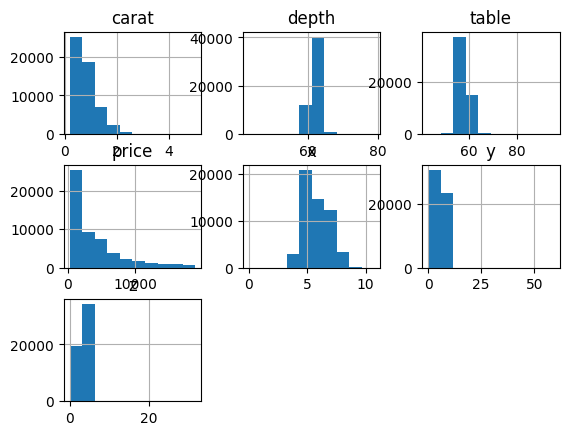

In [33]:
df.hist()

#### 4.1.1. univariantes:


#####  4.1.1.1. histogramas y curvas de densidad


##### 4.1.1.2. boxplot

#####  4.1.1.3. countplot


#### 4.1.2. bivariantes y multivariantes


##### 4.1.2.1. scatterplot con hue, con size, con style


##### 4.1.2.2. Calcular correlación con Pandas y mostrarla con seaborn


##### 4.1.2.3. Hacer la correlación en un gráfico de barras para la columna 'price'


##### 4.1.2.4. Crear una pivot table usando como index y columns algunas variables categóricas y como values usar el price y visualizarla con heatmap de seaborn


#### 4.1.3. Combinarlas con:


##### 4.1.3.1. hue, style, size, row, col usando un relplot


##### 4.1.3.2. filtro
